In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("housing.csv")
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [3]:
data[data.total_bedrooms.isna()]
housing = data.dropna()
housing = housing[housing.population < 20000]

In [4]:
outlier = housing[housing.total_bedrooms > 5000]
outlier

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6057     -117.78     34.03                 8.0      32054.0          5290.0   
8985     -118.44     33.98                21.0      18132.0          5419.0   
10309    -117.74     33.89                 4.0      37937.0          5471.0   
12201    -117.20     33.58                 2.0      30450.0          5033.0   
12623    -121.53     38.48                 5.0      27870.0          5027.0   
13139    -121.44     38.43                 3.0      39320.0          6210.0   

       population  households  median_income  median_house_value  \
6057      15507.0      5050.0         6.0191            253900.0   
8985       7431.0      4930.0         5.3359            500001.0   
10309     16122.0      5189.0         7.4947            366300.0   
12201      9419.0      3197.0         4.5936            174300.0   
12623     11935.0      4855.0         4.8811            212200.0   
13139     16305.0      5358.0         4.9516            153700.0   

      ocean_proximity  
6057        <1H OCEAN  
8985        <1H OCEAN  
10309       <1H OCEAN  
12201       <1H OCEAN  
12623          INLAND  
13139          INLAND

In [5]:
housing[housing.total_bedrooms.isna()]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

In [6]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20431.000000  20431.000000        20431.000000  20431.000000   
mean    -119.570685     35.633284           28.634673   2633.935148   
std        2.003559      2.136381           12.591401   2169.576593   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2126.000000   
75%     -118.010000     37.720000           37.000000   3142.500000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20431.000000  20431.000000  20431.000000   20431.000000   
mean       537.371886   1421.941804    498.951251       3.871302   
std        418.303011   1091.228330    379.142509       1.899331   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563800   
50%        435.000000   1166.000000    409.000000       3.536800   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6210.000000  16305.000000   5358.000000      15.000100   

       median_house_value  
count        20431.000000  
mean        206872.270276  
std         115438.559570  
min          14999.000000  
25%         119500.000000  
50%         179800.000000  
75%         264700.000000  
max         500001.000000

Text(0.5, 1.0, 'Map of data points')

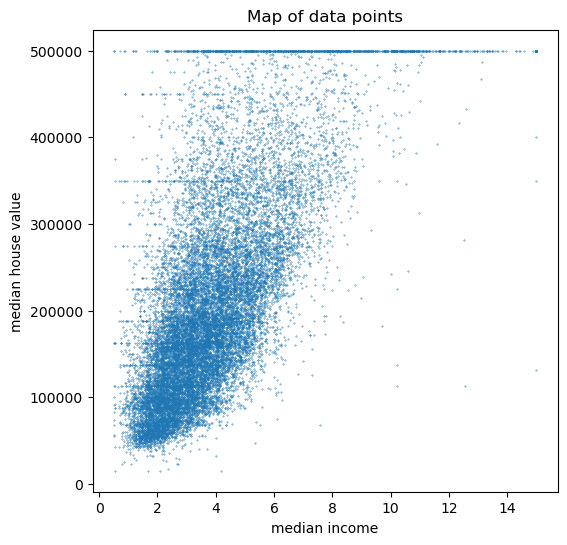

In [7]:
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter('median_income', 'median_house_value', data = housing, s = 0.1)
plt.xlabel("median income")
plt.ylabel("median house value")
plt.title("Map of data points")

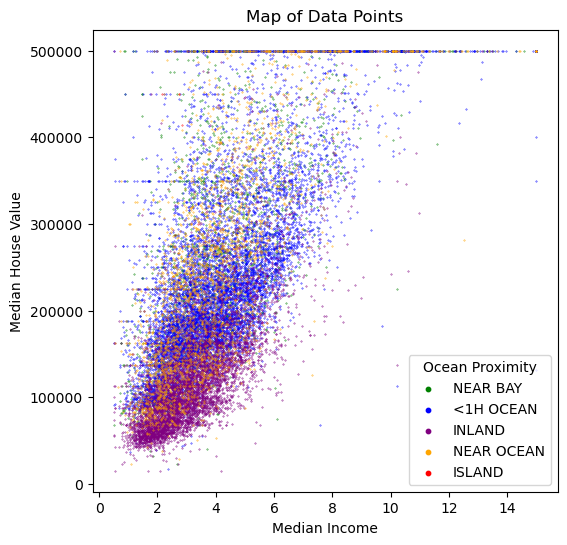

In [8]:
categories = housing['ocean_proximity'].unique()
colors = ['green', 'blue', 'purple', 'orange', 'red']  # Define colors for each category

# Create a scatter plot for each category
for i, category in enumerate(categories):
    data_category = housing[housing['ocean_proximity'] == category]
    plt.scatter('median_income', 'median_house_value', data=data_category, s=0.1, label=category, color=colors[i])

plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Map of Data Points")
plt.legend(title='Ocean Proximity', markerscale = 10)

plt.show()

Text(0.5, 1.0, 'Map of data points')

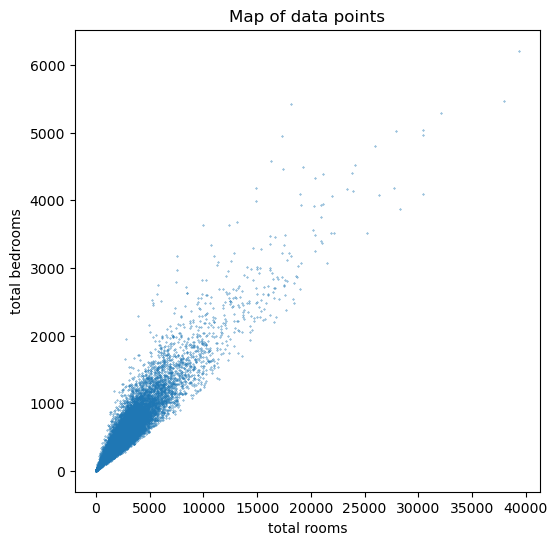

In [9]:
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter('total_rooms', 'total_bedrooms', data = housing, s = 0.1)
plt.xlabel("total rooms")
plt.ylabel("total bedrooms")
plt.title("Map of data points")

Text(0.5, 1.0, 'Map of data points')

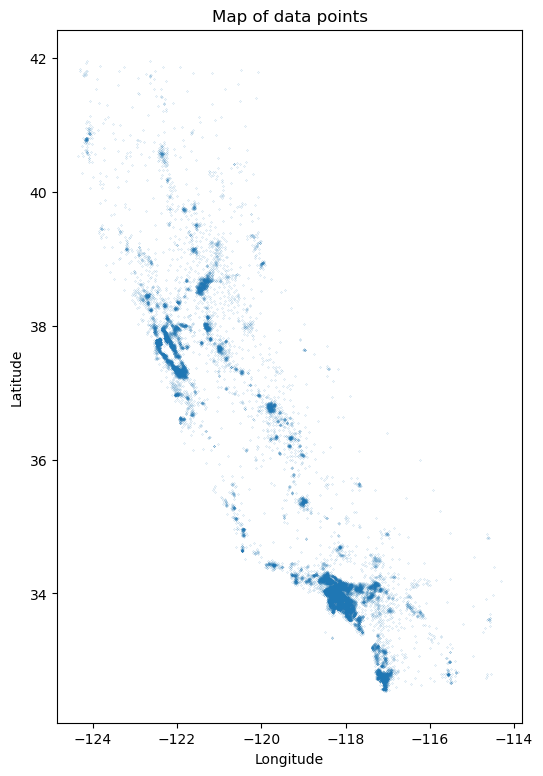

In [10]:
plt.rcParams["figure.figsize"] = (6,9)
plt.scatter('longitude', 'latitude', data = housing, s = 0.01)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Map of data points")

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

housing.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924619           -0.109387     0.046019   
latitude            -0.924619  1.000000            0.011872    -0.036711   
housing_median_age  -0.109387  0.011872            1.000000    -0.361746   
total_rooms          0.046019 -0.036711           -0.361746     1.000000   
total_bedrooms       0.070356 -0.067272           -0.321304     0.929355   
population           0.103838 -0.112131           -0.303715     0.864022   
households           0.057196 -0.072128           -0.303678     0.917757   
median_income       -0.015560 -0.079648           -0.118386     0.200232   
median_house_value  -0.045410 -0.144662            0.106355     0.135103   

                    total_bedrooms  population  households  median_income  \
longitude                 0.070356    0.103838    0.057196      -0.015560   
latitude                 -0.067272   -0.112131   -0.072128      -0.079648   
housing_median_age       -0.321304   -0.303715   -0.303678      -0.118386   
total_rooms               0.929355    0.864022    0.917757       0.200232   
total_bedrooms            1.000000    0.885398    0.979441      -0.006869   
population                0.885398    1.000000    0.914789       0.007335   
households                0.979441    0.914789    1.000000       0.014517   
median_income            -0.006869    0.007335    0.014517       1.000000   
median_house_value        0.050898   -0.024381    0.066335       0.688339   

                    median_house_value  
longitude                    -0.045410  
latitude                     -0.144662  
housing_median_age            0.106355  
total_rooms                   0.135103  
total_bedrooms                0.050898  
population                   -0.024381  
households                    0.066335  
median_income                 0.688339  
median_house_value            1.000000

In [12]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [13]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


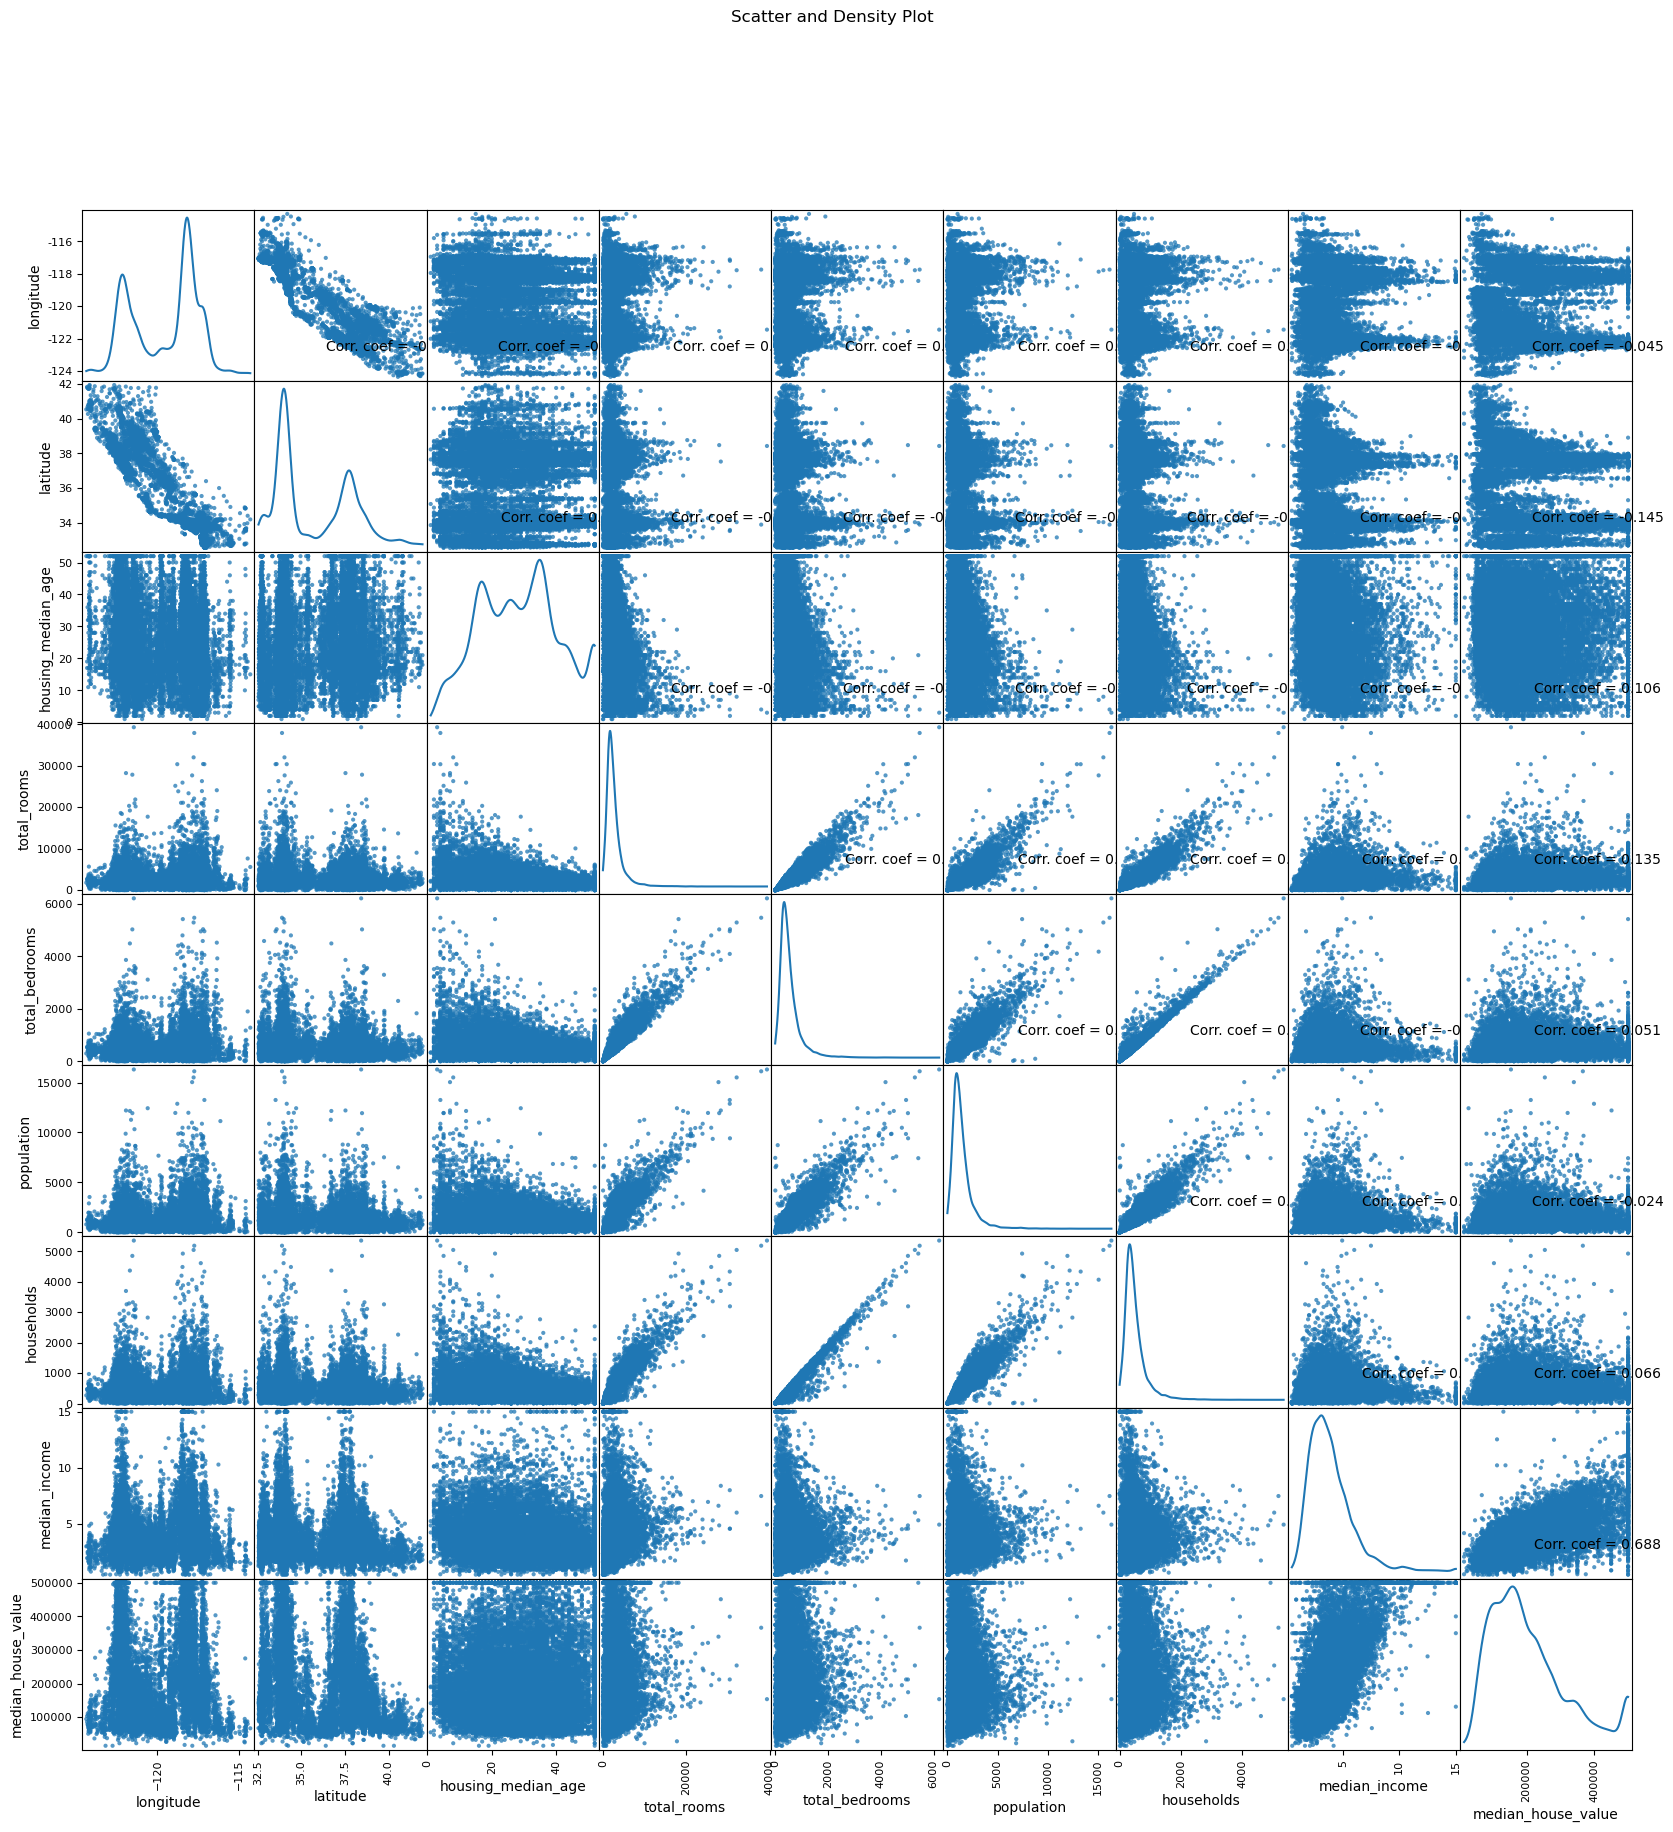

In [14]:
plotScatterMatrix(housing, 20, 10)

Text(0, 0.5, 'Count')

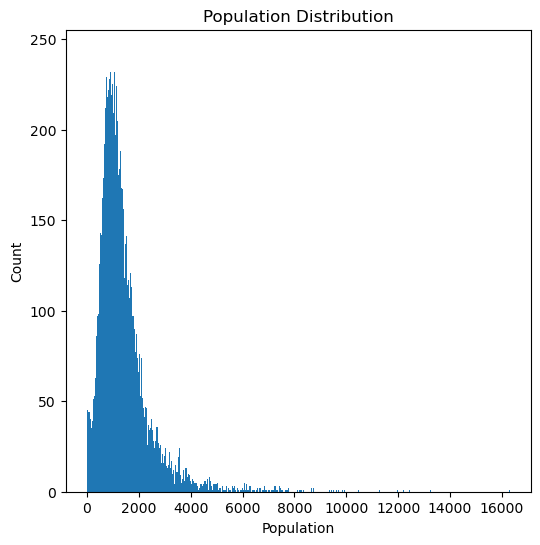

In [15]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(housing.population, bins=1000)
plt.title("Population Distribution")
plt.xlabel("Population")
plt.ylabel('Count')

Text(0.5, 1.0, 'Population versus Households')

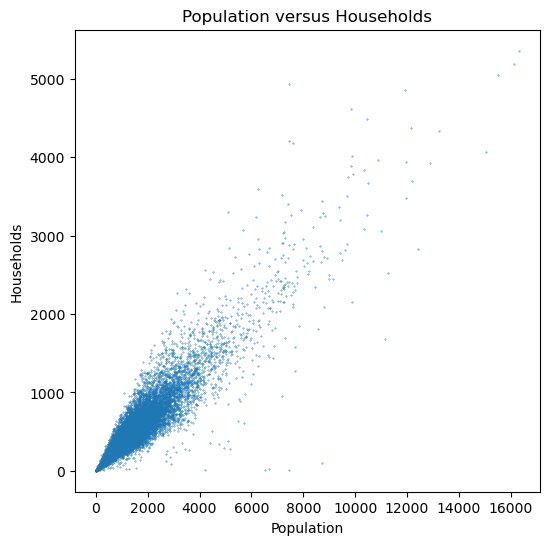

In [16]:
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter(housing.population, housing.households, s = 0.1)
plt.xlabel("Population")
plt.ylabel("Households")
plt.title("Population versus Households")


34.052235, -118.243683.

In [17]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [18]:

from geopy.geocoders import Nominatim


def get_coordinates(city_name):
    geolocator = Nominatim(user_agent="your_app_name")
    location = geolocator.geocode(city_name)
    return location.latitude, location.longitude

def create_bounding_box(city_name, delta=1):
    lat, lon = get_coordinates(city_name)
    southwest = (lat - delta, lon - delta)
    northeast = (lat + delta, lon + delta)
    return southwest, northeast

# Example for Los Angeles
city_name = "Los Angeles"
bounding_box = create_bounding_box(city_name)

In [19]:
def is_within_bounding_box(lat, lon, bounding_box):
    southwest, northeast = bounding_box
    return (southwest[0] <= lat <= northeast[0]) and (southwest[1] <= lon <= northeast[1])

def filter_data_by_bounding_box(data, bounding_box):
    return data[data.apply(lambda row: is_within_bounding_box(row['latitude'], row['longitude'], bounding_box), axis=1)]

# Example for Los Angeles
city_nameLA = "Los Angeles"
bounding_boxLA = create_bounding_box(city_name)

losangeles = filter_data_by_bounding_box(data, bounding_boxLA)
print("Filtered Data LA:")
print(losangeles)


city_nameSF = "san francisco"
bounding_boxSF = create_bounding_box(city_nameSF)

sanfran = filter_data_by_bounding_box(data, bounding_boxSF)
print("Filtered Data SF:")
print(sanfran)


city_nameSAC = "Sacramento"
bounding_boxSAC = create_bounding_box(city_nameSAC)

SAC = filter_data_by_bounding_box(data, bounding_boxSAC)
print("Filtered Data SAC:")
print(SAC)

Filtered Data LA:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3011     -118.93     34.82                24.0        806.0           168.0   
3012     -118.95     34.83                18.0       3278.0           762.0   
3013     -118.95     34.81                30.0       2817.0           604.0   
3014     -119.15     34.83                 6.0       8733.0          1600.0   
3015     -119.16     34.95                14.0       4054.0           787.0   
...          ...       ...                 ...          ...             ...   
20502    -118.68     34.33                45.0        121.0            25.0   
20503    -118.75     34.33                27.0        534.0            85.0   
20504    -118.73     34.29                11.0       5451.0           736.0   
20505    -118.72     34.29                22.0       3266.0           529.0   
20506    -118.73     34.29                 8.0       4983.0           754.0   

       population  households  me

In [20]:
from collections import Counter
c = Counter(losangeles.ocean_proximity)
print(c)

Counter({'<1H OCEAN': 6821, 'INLAND': 1327, 'NEAR OCEAN': 641, 'ISLAND': 5})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


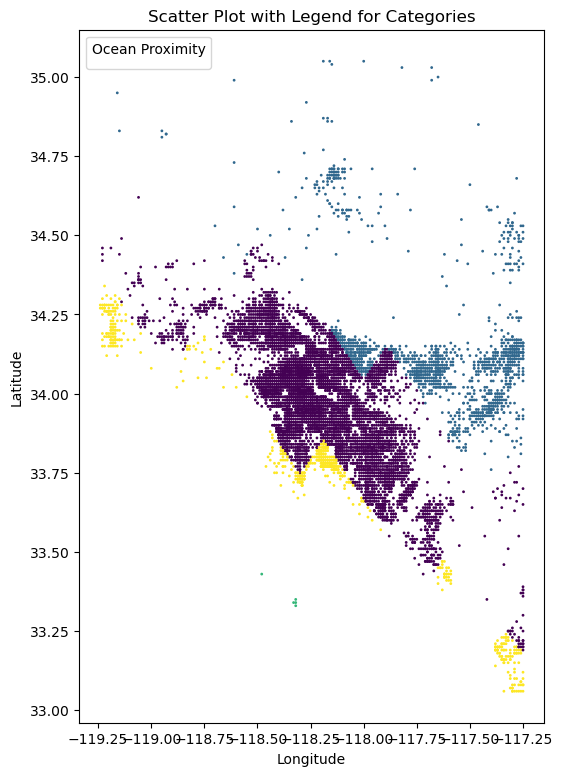

In [21]:
from matplotlib.patches import Patch

plt.rcParams["figure.figsize"] = (6,9)
losangeles['category_label'] = pd.Categorical(losangeles['ocean_proximity']).codes

scatter = plt.scatter(losangeles.longitude, losangeles.latitude, c=losangeles.category_label, s=1)

plt.legend(title='Ocean Proximity', markerscale=5)

plt.title('Scatter Plot with Legend for Categories')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

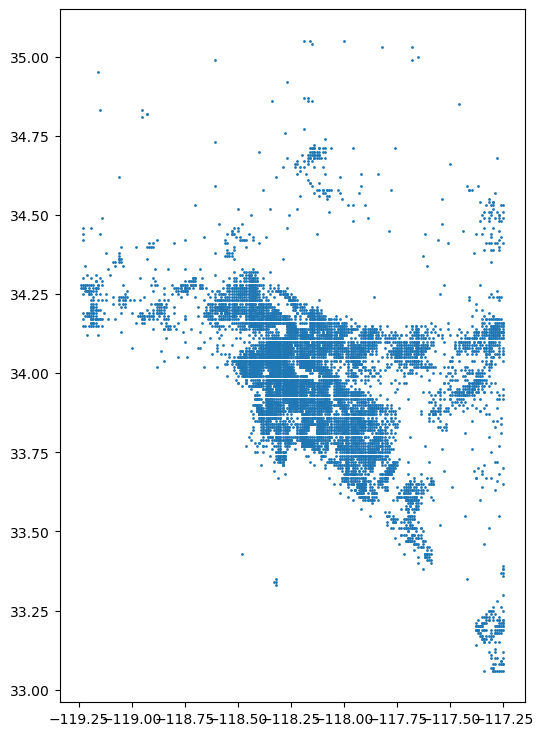

In [22]:
plt.scatter(losangeles.longitude, losangeles.latitude, s = 1)

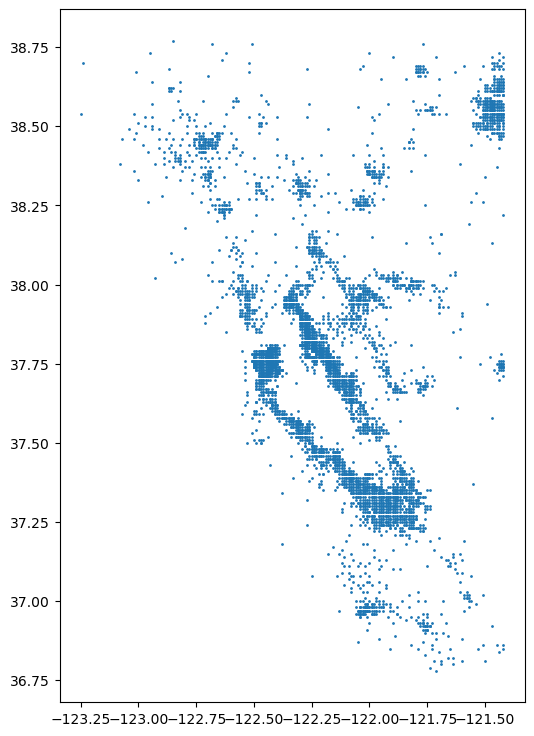

In [23]:
plt.rcParams["figure.figsize"] = (6,9)

plt.scatter(sanfran.longitude, sanfran.latitude, s = 1)

Counter({'NEAR BAY': 2290, '<1H OCEAN': 1321, 'INLAND': 811, 'NEAR OCEAN': 632})


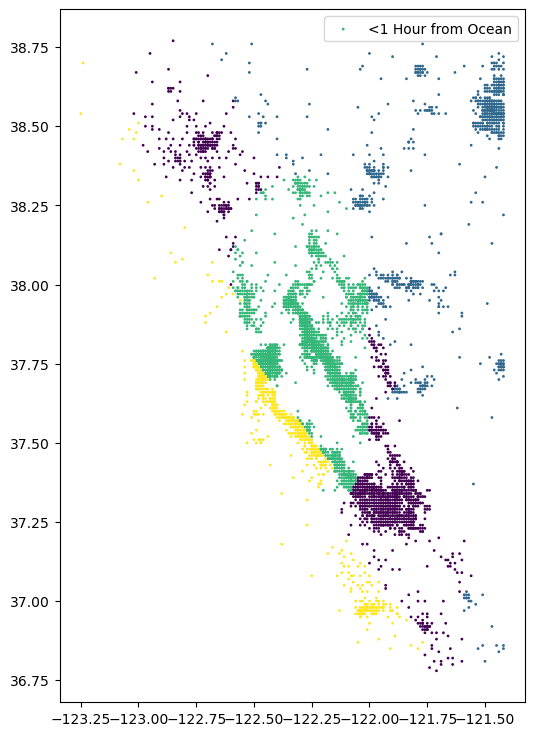

In [24]:
c = Counter(sanfran.ocean_proximity)
print(c)

sanfran['category_label'] = pd.Categorical(sanfran['ocean_proximity']).codes
plt.scatter(sanfran.longitude, sanfran.latitude, c=sanfran.category_label, s = 1)
plt.legend(['<1 Hour from Ocean', 'Near Ocean', 'Inland', 'island'], fontsize = 10, fancybox = True)

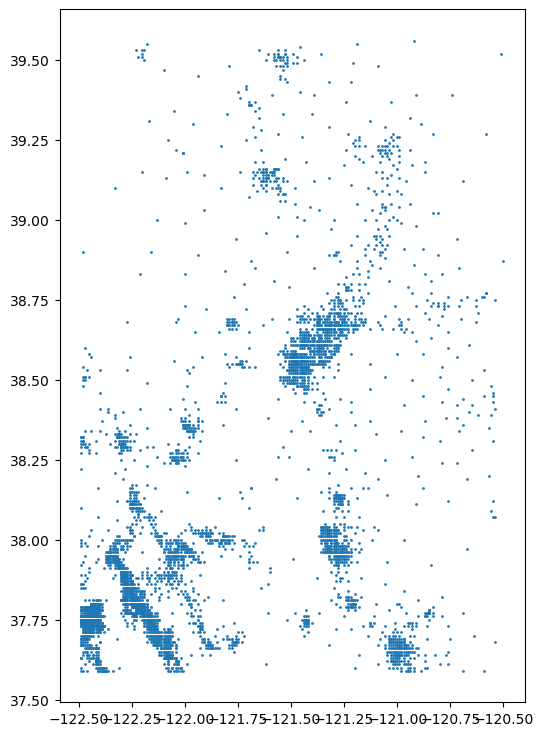

In [25]:
plt.rcParams["figure.figsize"] = (6,9)

plt.scatter(SAC.longitude, SAC.latitude, s = 1)

Counter({'INLAND': 2262, 'NEAR BAY': 1911, 'NEAR OCEAN': 191, '<1H OCEAN': 75})


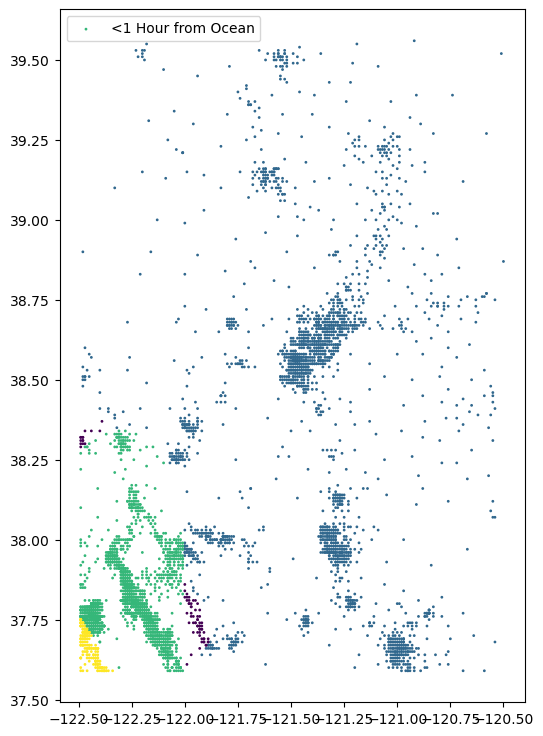

In [26]:
c = Counter(SAC.ocean_proximity)
print(c)
SAC['category_label'] = pd.Categorical(SAC['ocean_proximity']).codes
plt.scatter(SAC.longitude, SAC.latitude, c=SAC.category_label, s = 1)
plt.legend(['<1 Hour from Ocean', 'Near Ocean', 'Inland', 'island'], fontsize = 10, fancybox = True)

Text(0.5, 1.0, 'Inland Median Income')

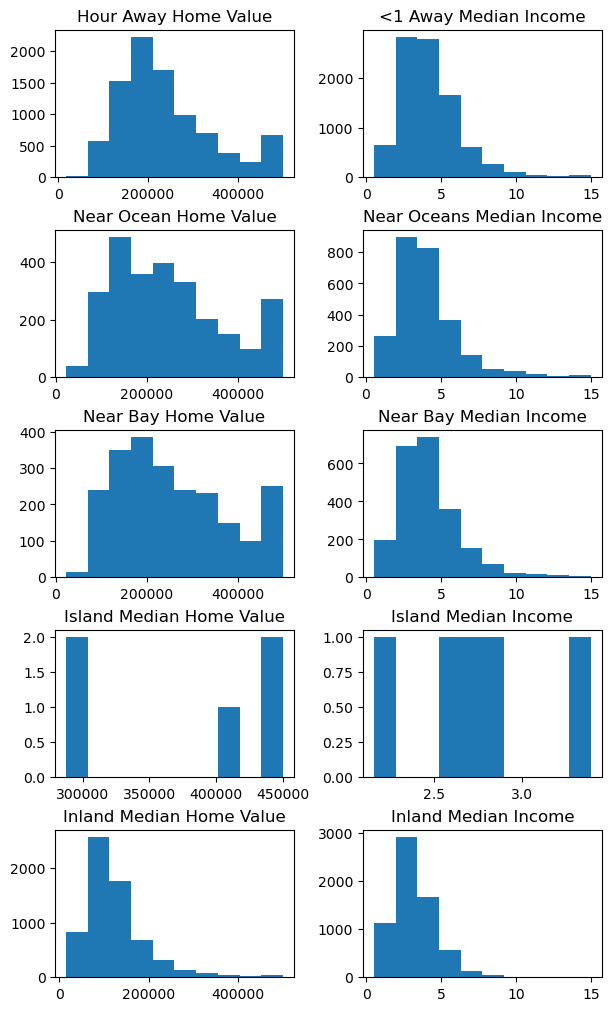

In [27]:
houraway = housing[housing.ocean_proximity == '<1H OCEAN']
nearocean = housing[housing.ocean_proximity == 'NEAR OCEAN']
nearbay = housing[housing.ocean_proximity == 'NEAR BAY']
island = housing[housing.ocean_proximity == 'ISLAND']
inland = housing[housing.ocean_proximity == 'INLAND']

rows, cols = 5, 2
i = 0
fig, axes = plt.subplots(rows,cols, constrained_layout = True)

fig.set_figheight(10)
axes[0, 0].hist(houraway.loc[:,"median_house_value"])
axes[0, 0].set_title("Hour Away Home Value")
axes[0, 1].hist(houraway.loc[:,"median_income"])
axes[0,1].set_title("<1 Away Median Income")
axes[1, 0].hist(nearocean.loc[:,"median_house_value"])
axes[1,0].set_title("Near Ocean Home Value")
axes[1, 1].hist(nearocean.loc[:,"median_income"])
axes[1,1].set_title("Near Oceans Median Income")
axes[2, 0].hist(nearbay.loc[:,"median_house_value"])
axes[2,0].set_title("Near Bay Home Value")
axes[2, 1].hist(nearbay.loc[:,"median_income"])
axes[2,1].set_title("Near Bay Median Income")
axes[3, 0].hist(island.loc[:,"median_house_value"], bins = 10)
axes[3,0].set_title("Island Median Home Value")
axes[3, 1].hist(island.loc[:,"median_income"])
axes[3,1].set_title("Island Median Income")
axes[4, 0].hist(inland.loc[:,"median_house_value"])
axes[4,0].set_title("Inland Median Home Value")
axes[4, 1].hist(inland.loc[:,"median_income"])
axes[4,1].set_title("Inland Median Income")

In [28]:
island

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8314    -118.32     33.35                27.0       1675.0           521.0   
8315    -118.33     33.34                52.0       2359.0           591.0   
8316    -118.32     33.33                52.0       2127.0           512.0   
8317    -118.32     33.34                52.0        996.0           264.0   
8318    -118.48     33.43                29.0        716.0           214.0   

      population  households  median_income  median_house_value  \
8314       744.0       331.0         2.1579            450000.0   
8315      1100.0       431.0         2.8333            414700.0   
8316       733.0       288.0         3.3906            300000.0   
8317       341.0       160.0         2.7361            450000.0   
8318       422.0       173.0         2.6042            287500.0   

     ocean_proximity  
8314          ISLAND  
8315          ISLAND  
8316          ISLAND  
8317          ISLAND  
8318          ISLAND

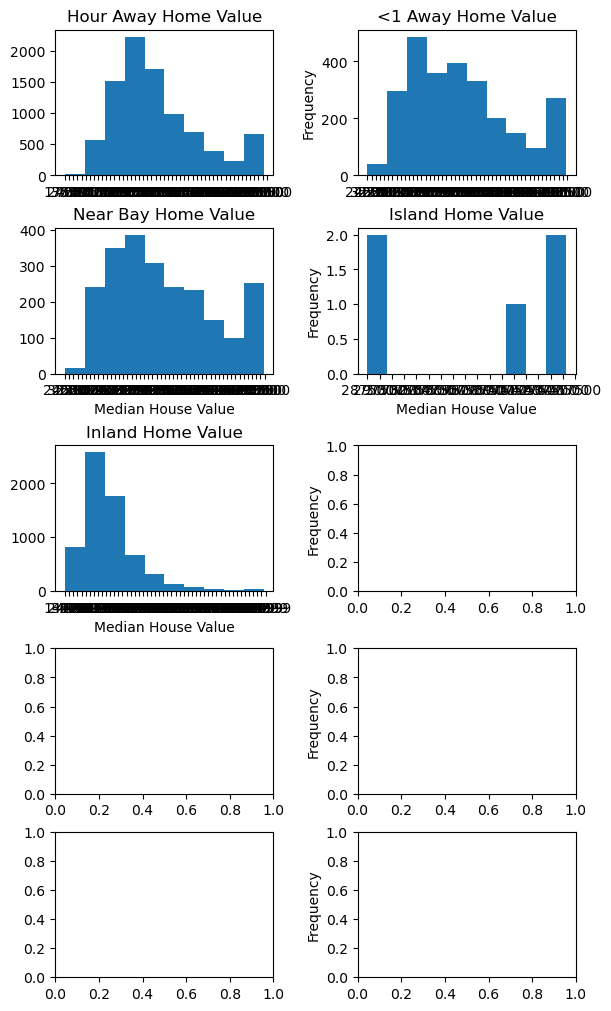

In [29]:
import matplotlib.pyplot as plt

# Assuming you have defined your houraway, nearocean, nearbay, island, inland DataFrames

rows, cols = 5, 2
fig, axes = plt.subplots(rows, cols, constrained_layout=True)

fig.set_figheight(10)

# Define the step for x-axis ticks
xtick_step = 10000

# Iterate through each subplot
for i, (ax, df, title_suffix) in enumerate(zip(axes.flatten(), [houraway, nearocean, nearbay, island, inland], ["Hour Away", "<1 Away", "Near Bay", "Island", "Inland"])):
    # Plot histogram
    ax.hist(df["median_house_value"])
    
    # Set x-axis ticks
    xticks = range(int(min(df["median_house_value"])), int(max(df["median_house_value"])) + xtick_step, xtick_step)
    ax.set_xticks(xticks)
    
    # Set titles
    ax.set_title(f"{title_suffix} Home Value")

    # Only set x-labels for the bottom row
    if i >= 2:
        ax.set_xlabel("Median House Value")

# Set y-labels for the middle column
for ax in axes[:, 1]:
    ax.set_ylabel("Frequency")

plt.show()


## Logistic Regression

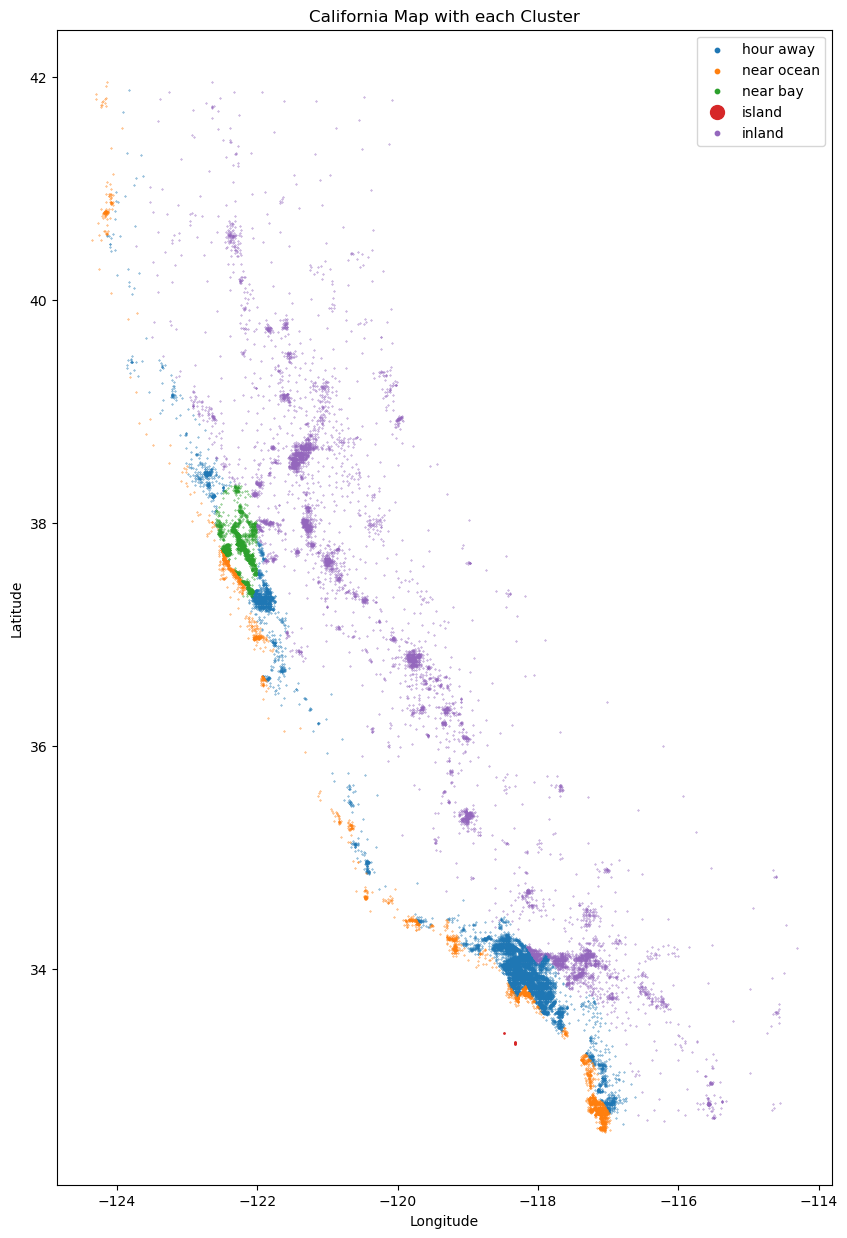

In [30]:

plt.rcParams["figure.figsize"] = (10,15)

plt.scatter(houraway.longitude, houraway.latitude, s = 0.1)
plt.title("<1 Away map")
plt.scatter(nearocean.longitude, nearocean.latitude, s =0.1)
plt.title("near ocean map")
plt.scatter(nearbay.longitude, nearbay.latitude, s=0.1)
plt.title("near bay map")
plt.scatter(island.longitude, island.latitude, s= 1)
plt.title("island map")
plt.scatter(inland.longitude, inland.latitude, s= 0.1)
plt.title("California Map with each Cluster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend(['hour away', 'near ocean', 'near bay', 'island', 'inland'], fontsize = 10, fancybox = True, markerscale = 10)
plt.savefig('California.png')

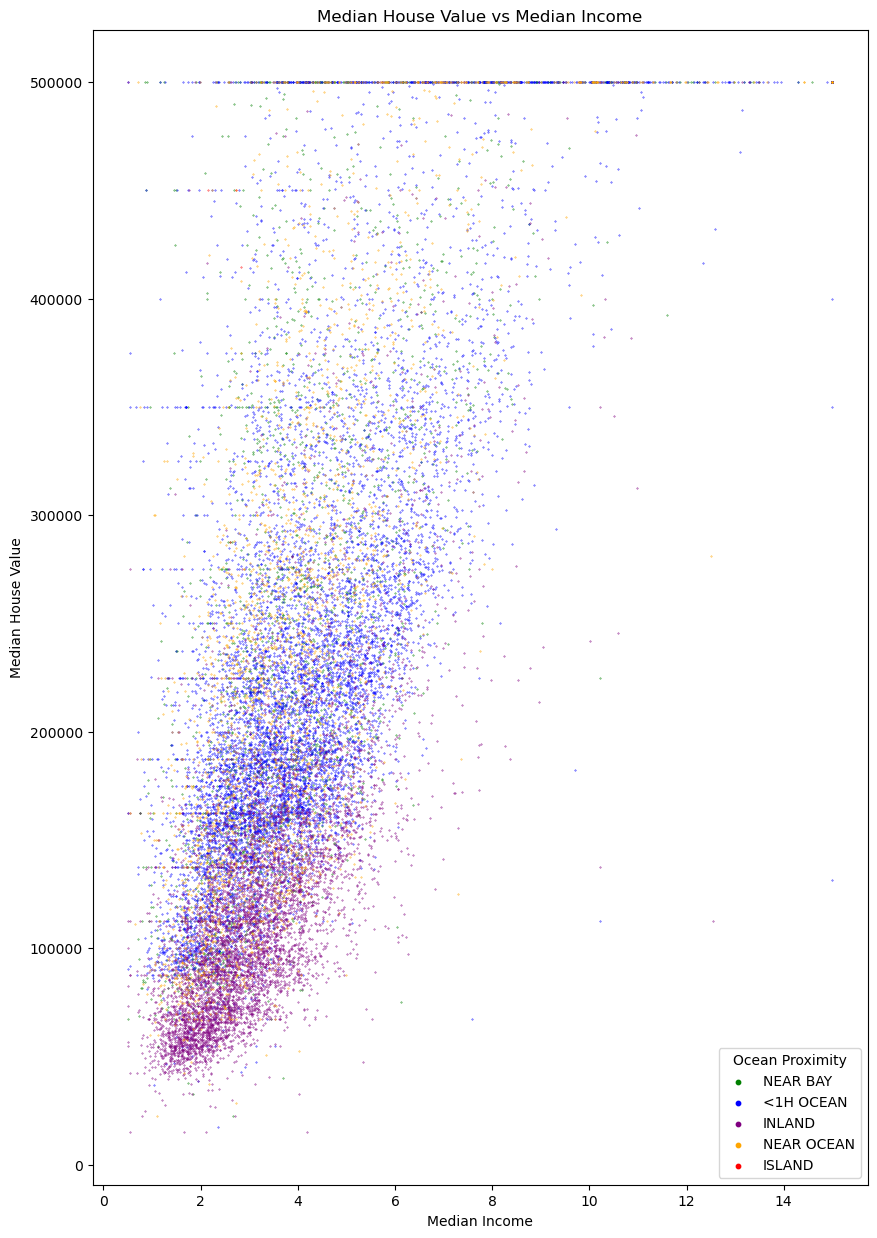

In [31]:
categories = housing['ocean_proximity'].unique()
colors = ['green', 'blue', 'purple', 'orange', 'red']  # Define colors for each category

# Create a scatter plot for each category
for i, category in enumerate(categories):
    data_category = housing[housing['ocean_proximity'] == category]
    plt.scatter('median_income', 'median_house_value', data=data_category, s=0.1, label=category, color=colors[i])

plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median House Value vs Median Income")
plt.legend(title='Ocean Proximity', markerscale = 10)

plt.show()

In [32]:
import plotly.express as px
mapbox_token = 'pk.eyJ1IjoiYWRtMTU4MjQiLCJhIjoiY2xveHBtZG82MDY0ZzJsbzExZWdobWk2ayJ9.z4wio2qgfcRAEXKtYjqkiw'
px.set_mapbox_access_token(mapbox_token)

# Assuming 'housing' is your DataFrame
fig = px.scatter_mapbox(housing, lat="latitude", lon="longitude", color="ocean_proximity",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [34]:
from collections import Counter
#c = Counter(housing.ocean_proximity)
#print(c)
near_Ocean = []
for i in range(len(housing['ocean_proximity'])):
    #print(housing.iloc[i,9])
    if housing.iloc[i,9] in ['<1H OCEAN','NEAR OCEAN', 'NEAR BAY','ISLAND']:
        near_Ocean.append(1)
    else:
        near_Ocean.append(0)

housing['Near_Ocean'] = near_Ocean
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   Near_Ocean  
0           1  
1           1  
2           1  
3           1  
4           1

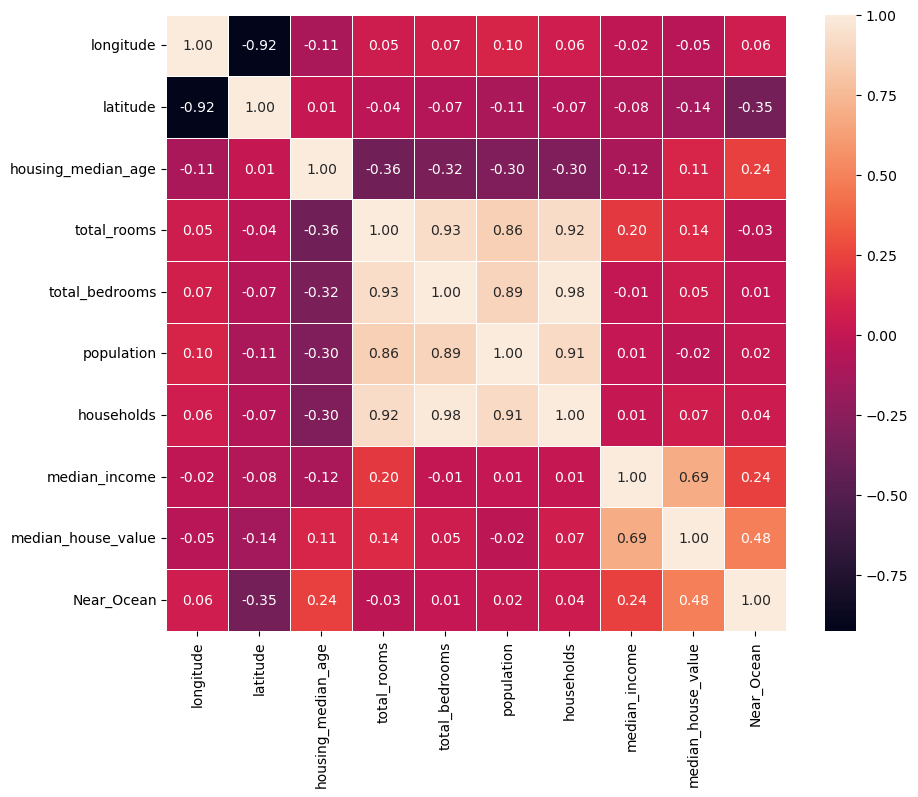

In [35]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
sns.heatmap(housing.corr(numeric_only=True), annot=True, fmt = ".2f", linewidths=.5)
plt.savefig('heatmap.png')

In [36]:
Housing_data1 = housing.loc[:, ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
Housing_test = housing.loc[:, ['Near_Ocean']]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(
    Housing_data1, Housing_test, test_size=0.25,random_state=1)

In [74]:
c = Counter(near_Ocean)
c

Counter({1: 13935, 0: 6496})

In [39]:
from sklearn.linear_model import LogisticRegression

In [72]:
model1 = LogisticRegression()


In [42]:
model1.fit(x_train,y_train)

LogisticRegression()

In [43]:
yhattrain = model1.predict(x_train)

In [77]:
print(metrics.classification_report(y_train, yhattrain))
print(metrics.confusion_matrix(y_train, yhattrain))
#print(metrics.classification_report(yhattrain, y_train))
#print(metrics.confusion_matrix(yhattrain, y_train))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      4873
           1       0.88      0.92      0.90     10450

    accuracy                           0.86     15323
   macro avg       0.85      0.83      0.84     15323
weighted avg       0.86      0.86      0.86     15323

[[3548 1325]
 [ 802 9648]]


In [45]:
y_hat = model1.predict(x_test)

In [46]:
print(y_hat)

[1 1 1 ... 1 1 1]


In [47]:
y_hat.shape

(5108,)

In [48]:
#Use sscore method to get accuracy of the model
score = model1.score(x_test,y_test)
print(score)

0.8645262333594361


In [49]:
print(metrics.classification_report(y_test, y_hat))
print(metrics.confusion_matrix(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1623
           1       0.88      0.92      0.90      3485

    accuracy                           0.86      5108
   macro avg       0.85      0.83      0.84      5108
weighted avg       0.86      0.86      0.86      5108

[[1193  430]
 [ 262 3223]]


In [50]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  Near_Ocean  
0            NEAR BAY           1  
1            NEAR BAY           1  
2            NEAR BAY           1  
3            NEAR BAY           1  
4            NEAR BAY           1  
...               ...         ...  
20635          INLAND           0  
20636          INLAND           0  
20637          INLAND           0  
20638          INLAND           0  
20639          INLAND           0  

[20431 rows x 11 columns]

In [51]:
print(model1.coef_)
print(model1.intercept_)

[[ 2.39435336e-02 -1.18828271e-02  1.77120674e-02 -1.40877503e-03
   3.00122015e-03  9.48942149e-04  1.83479286e-03 -1.00867104e-03
   2.00572813e-05]]
[-0.00019369]


In [52]:
odds = -0.00019369 + 2.39435336e-02*housing.longitude -1.18828271e-02*housing.latitude + 1.77120674e-02*housing.housing_median_age -1.40877503e-03*housing.total_rooms + 3.00122015e-03*housing.total_bedrooms + 9.48942149e-04*housing.population + 1.83479286e-03*housing.households - 1.00867104e-03*housing.median_income + 2.00572813e-05*housing.median_house_value
odds

0        6.102968
1        1.862519
2        3.898052
3        4.225667
4        3.963322
           ...   
20635   -1.176765
20636   -1.493731
20637   -1.190228
20638   -1.407091
20639   -1.082894
Length: 20431, dtype: float64

In [53]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20431.000000  20431.000000        20431.000000  20431.000000   
mean    -119.570685     35.633284           28.634673   2633.935148   
std        2.003559      2.136381           12.591401   2169.576593   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2126.000000   
75%     -118.010000     37.720000           37.000000   3142.500000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20431.000000  20431.000000  20431.000000   20431.000000   
mean       537.371886   1421.941804    498.951251       3.871302   
std        418.303011   1091.228330    379.142509       1.899331   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563800   
50%        435.000000   1166.000000    409.000000       3.536800   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6210.000000  16305.000000   5358.000000      15.000100   

       median_house_value    Near_Ocean  
count        20431.000000  20431.000000  
mean        206872.270276      0.682052  
std         115438.559570      0.465691  
min          14999.000000      0.000000  
25%         119500.000000      0.000000  
50%         179800.000000      1.000000  
75%         264700.000000      1.000000  
max         500001.000000      1.000000

In [54]:
oddsmin = -0.00019369 + 2.39435336e-02*housing.longitude -1.18828271e-02*housing.latitude + 1.77120674e-02*housing.housing_median_age -1.40877503e-03*housing.total_rooms + 3.00122015e-03*housing.total_bedrooms + 9.48942149e-04*housing.population + 1.83479286e-03*housing.households - 1.00867104e-03*housing.median_income + 2.00572813e-05*14999
sum(oddsmin)/len(oddsmin)

-2.315487043368862

In [55]:
odds25 = -0.00019369 + 2.39435336e-02*housing.longitude -1.18828271e-02*housing.latitude + 1.77120674e-02*housing.housing_median_age -1.40877503e-03*housing.total_rooms + 3.00122015e-03*housing.total_bedrooms + 9.48942149e-04*housing.population + 1.83479286e-03*housing.households - 1.00867104e-03*housing.median_income + 2.00572813e-05*119500
sum(odds25)/len(odds25)

-0.21948109023756468

In [56]:
odds50 = -0.00019369 + 2.39435336e-02*housing.longitude -1.18828271e-02*housing.latitude + 1.77120674e-02*housing.housing_median_age -1.40877503e-03*housing.total_rooms + 3.00122015e-03*housing.total_bedrooms + 9.48942149e-04*housing.population + 1.83479286e-03*housing.households - 1.00867104e-03*housing.median_income + 2.00572813e-05*179800
sum(odds50)/len(odds50)

0.9899729721524413

In [57]:
odds75 = -0.00019369 + 2.39435336e-02*housing.longitude -1.18828271e-02*housing.latitude + 1.77120674e-02*housing.housing_median_age -1.40877503e-03*housing.total_rooms + 3.00122015e-03*housing.total_bedrooms + 9.48942149e-04*housing.population + 1.83479286e-03*housing.households - 1.00867104e-03*housing.median_income + 2.00572813e-05*264700
sum(odds75)/len(odds75)

2.6928361545224098

In [58]:
oddsmax = -0.00019369 + 2.39435336e-02*housing.longitude -1.18828271e-02*housing.latitude + 1.77120674e-02*housing.housing_median_age -1.40877503e-03*housing.total_rooms + 3.00122015e-03*housing.total_bedrooms + 9.48942149e-04*housing.population + 1.83479286e-03*housing.households - 1.00867104e-03*housing.median_income + 2.00572813e-05*500001
sum(oddsmax)/len(oddsmax)

7.412334501693712

In [59]:
graphodds = -0.00019369 + 2.39435336e-02*-118.490000 -1.18828271e-02*34.260000 + 1.77120674e-02*29.000000 -1.40877503e-03*2126.000000 + 3.00122015e-03*435.000000 + 9.48942149e-04*1166.000000 + 1.83479286e-03*409.000000 - 1.00867104e-03*3.536800 + 2.00572813e-05*housing.median_house_value

Text(0, 0.5, 'Likely to be near the Ocean')

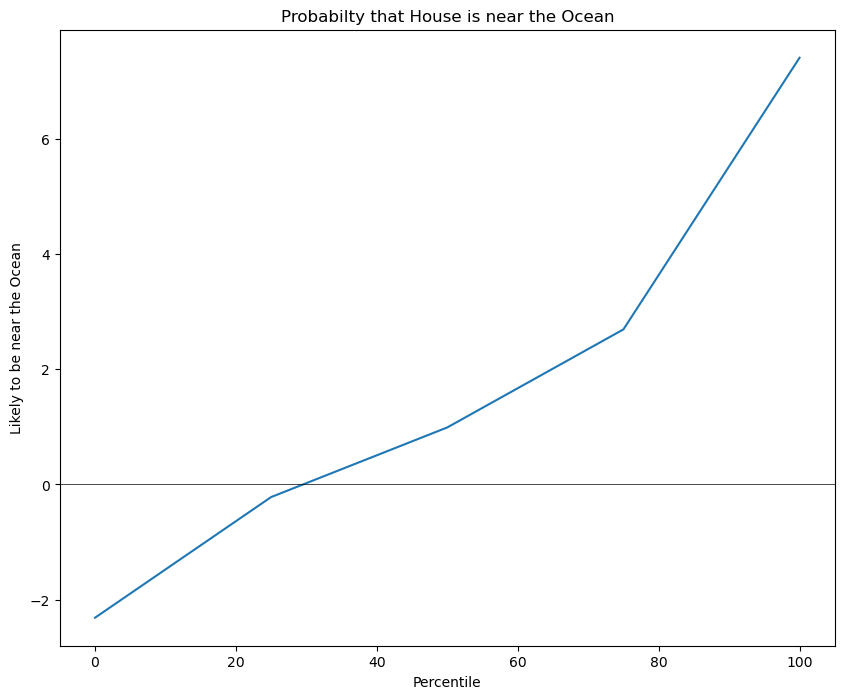

In [60]:
totalodds = [-2.315487043368862,-0.21948109023756468, 0.9899729721524413, 2.6928361545224098, 7.412334501693712]
percentiles = [0,25,50,75,100]
plt.plot(percentiles, totalodds)
plt.axhline(0, color = 'black', lw = 0.5)
plt.title("Probabilty that House is near the Ocean")
plt.xlabel("Percentile")
plt.ylabel("Likely to be near the Ocean")

# Logistic Regression 2

In [61]:
Housing_data2 = housing.loc[:, ['latitude', 'housing_median_age', 'median_income', 'median_house_value']]

In [62]:
x_train, x_test, y_train, y_test = train_test_split(
    Housing_data2, Housing_test, test_size=0.25,random_state=1)

In [68]:
model2 = LogisticRegression()

In [69]:
model2.fit(x_train,y_train)

LogisticRegression()

In [70]:
y_hat2 = model2.predict(x_test)

In [71]:
print(metrics.classification_report(y_test, y_hat2))
print(metrics.confusion_matrix(y_test, y_hat2))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1623
           1       0.88      0.91      0.90      3485

    accuracy                           0.86      5108
   macro avg       0.84      0.83      0.83      5108
weighted avg       0.85      0.86      0.85      5108

[[1208  415]
 [ 323 3162]]
